In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded succesfully.")

Libraries loaded succesfully.


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/Titanic-Dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Create a copy to preserve original data
df_processed = df.copy()

print(f"Original dataset: {df.shape}")
print(f"Processing dataset: {df_processed.shape}")
print(f"\nColumns: {list(df_processed.columns)}")

Original dataset: (891, 12)
Processing dataset: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Title groups:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


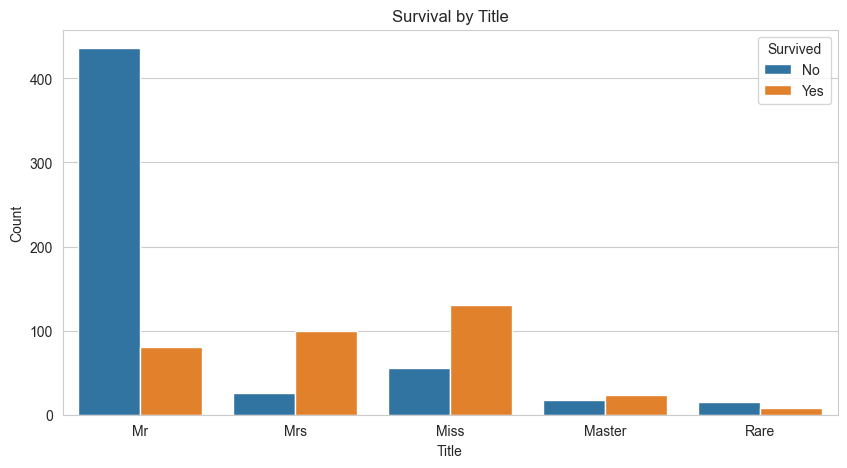


Survival rate by title:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


In [5]:
# Extract title from Name column
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check titles
print("Title distribution:")
print(df_processed['Title'].value_counts())

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare',
    'Sir': 'Rare',
    
}

df_processed['Title'] = df_processed['Title'].map(title_mapping)

print("\nTitle groups:")
print(df_processed['Title'].value_counts())

# Visualize survival by title
plt.figure(figsize=(10, 5))
sns.countplot(data=df_processed, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival rate by title
print("\nSurvival rate by title:")
print(df_processed.groupby('Title')['Survived'].mean().sort_values(ascending=False))

Family Size distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Family Size Category distribution:
FamilySizeCategory
Alone     537
Small     263
Medium     66
Large      25
Name: count, dtype: int64


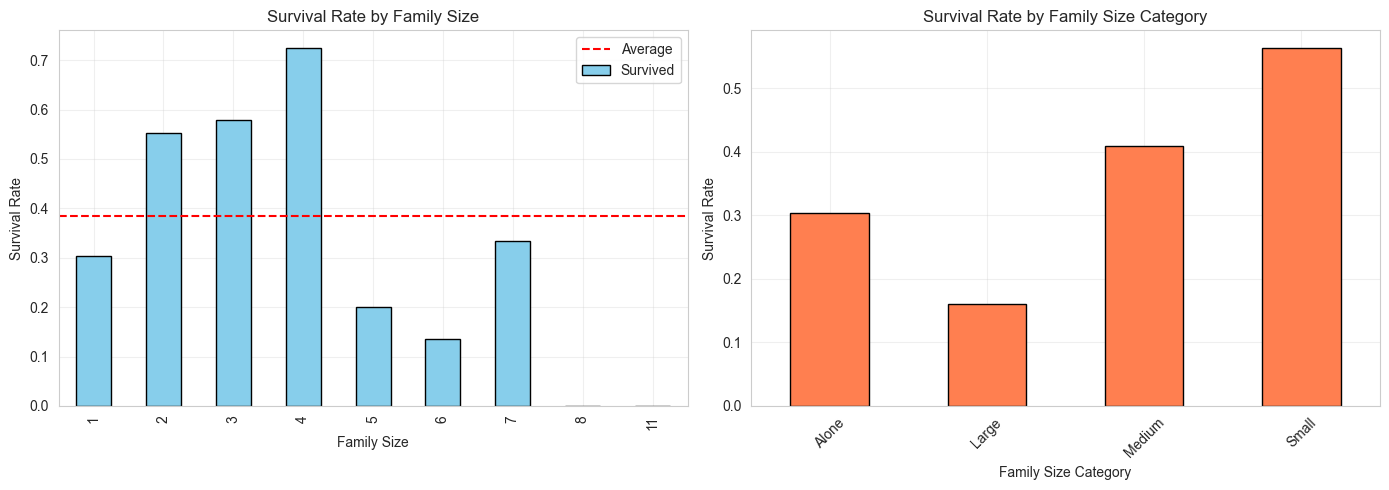


✅ Family features created: FamilySize, IsAlone, FamilySizeCategory


In [7]:
# Create FamilySize feature
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# Create FamilySize category
def categorize_family(size):
    if size == 1:
        return 'Alone'
    elif size <= 3:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

df_processed['FamilySizeCategory'] = df_processed['FamilySize'].apply(categorize_family)

print("Family Size distribution:")
print(df_processed['FamilySize'].value_counts().sort_index())

print("\nFamily Size Category distribution:")
print(df_processed['FamilySizeCategory'].value_counts())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_processed.groupby('FamilySize')['Survived'].mean().plot(kind='bar', ax=axes[0], 
                                                             color='skyblue', edgecolor='black')
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate')
axes[0].axhline(y=df_processed['Survived'].mean(), color='r', linestyle='--', label='Average')
axes[0].legend()
axes[0].grid(alpha=0.3)

df_processed.groupby('FamilySizeCategory')['Survived'].mean().plot(kind='bar', ax=axes[1], 
                                                                     color='coral', edgecolor='black')
axes[1].set_title('Survival Rate by Family Size Category')
axes[1].set_xlabel('Family Size Category')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Family features created: FamilySize, IsAlone, FamilySizeCategory")